In [480]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# text vectorizers: CountVectorizer && TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# classifiers: MultinomialNB && RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shariahoque/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shariahoque/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shariahoque/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load Data

In [481]:
df = pd.read_csv('DataNews/news_articles.csv')
print(df.shape)
df.head(2)

(2096, 12)


,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0


## "Target" a column where Real = 1, Fake = 0

In [482]:
df['target'] = df.loc[:, 'label']
df = pd.get_dummies(df, columns=['target'], drop_first=True)
df.head(2)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage,target_Real
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0,1
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0,1


In [483]:
df.language.value_counts()

english    2017
german       72
ignore        3
french        2
spanish       1
Name: language, dtype: int64

In [484]:
#keeping only english language
df = df[df.language == 'english']

In [485]:
df.language.value_counts()

english    2017
Name: language, dtype: int64

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 2094
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2017 non-null   object 
 1   published                2017 non-null   object 
 2   title                    2017 non-null   object 
 3   text                     1972 non-null   object 
 4   language                 2017 non-null   object 
 5   site_url                 2017 non-null   object 
 6   main_img_url             2017 non-null   object 
 7   type                     2017 non-null   object 
 8   label                    2017 non-null   object 
 9   title_without_stopwords  2016 non-null   object 
 10  text_without_stopwords   1968 non-null   object 
 11  hasImage                 2017 non-null   float64
 12  target_Real              2017 non-null   uint8  
dtypes: float64(1), object(11), uint8(1)
memory usage: 206.8+ KB


In [487]:
#  Inspect 
print(df.isnull().sum())

author                      0
published                   0
title                       0
text                       45
language                    0
site_url                    0
main_img_url                0
type                        0
label                       0
title_without_stopwords     1
text_without_stopwords     49
hasImage                    0
target_Real                 0
dtype: int64


In [488]:

df = df.dropna()


print(df.shape)

(1967, 13)


In [489]:
df.isnull().sum()

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    0
text_without_stopwords     0
hasImage                   0
target_Real                0
dtype: int64

In [490]:
print(df.duplicated().sum())

10


In [491]:
df = df.drop_duplicates()

print(df.shape, 'after')

(1957, 13) after


In [492]:
print(df.duplicated().sum())

0


In [493]:
#  Find Label balances.
df.label.value_counts()

Fake    1207
Real     750
Name: label, dtype: int64

In [494]:
#  Find Type balances.
df.type.value_counts()

bs            514
conspiracy    430
bias          389
hate          241
satire        146
state         120
junksci       102
fake           15
Name: type, dtype: int64

In [495]:
print("Original TEXT:", df['title'][10],":::REAL or FAKE:", df['label'][10])

Original TEXT: yikes hillary goes off the railspulls a howard dean video :::REAL or FAKE: Real


In [496]:
print("Clean TEXT from data:", df['title_without_stopwords'][10],":::REAL or FAKE:", df['label'][10])

Clean TEXT from data: yikes hillary goes railspulls howard dean video :::REAL or FAKE: Real


In [497]:
print("ORIGINAL TEXT:", df['text'][90])

ORIGINAL TEXT: hell thats a good speech  maybe there is more to him than we know  he only needs to puts clips of that speech on tv everywhere on the net and he will succeed  now he just has to watch out for the ugly  un who is behind it all  what are those who were behind ron paul etc waiting for  this is the guy you have to vote for this time


In [498]:
print("Clean TEXT from data:", df['text_without_stopwords'][90])

Clean TEXT from data: hell thats good speech maybe know needs puts clips speech tv everywhere net succeed watch ugly un behind behind ron paul etc waiting guy vote time


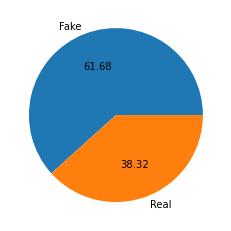

In [499]:
plt.pie(df['label'].value_counts(), labels=['Fake','Real'],autopct="%0.2f")
plt.show()

Fake    1207
Real     750
Name: label, dtype: int64


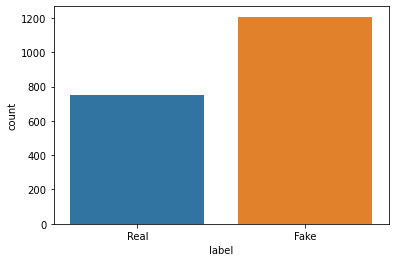

In [500]:
print(df.label.value_counts())
sns.countplot(x=df["label"])

bs            514
conspiracy    430
bias          389
hate          241
satire        146
state         120
junksci       102
fake           15
Name: type, dtype: int64


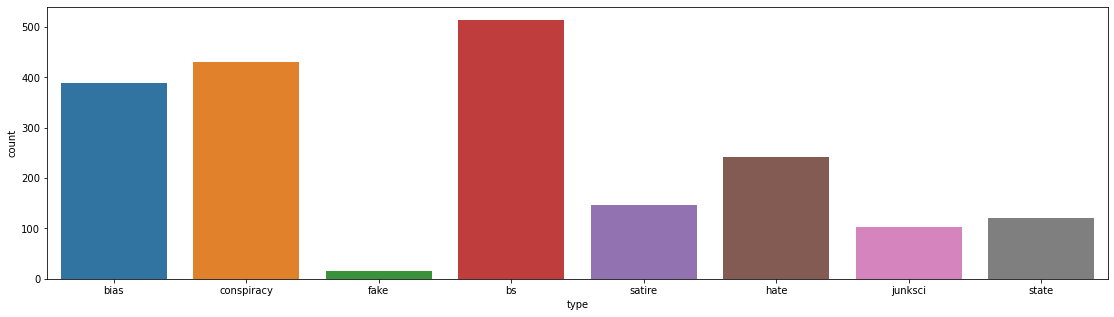

In [685]:
print(df.type.value_counts())
plt.figure(figsize=(19,5))
sns.countplot(x= 'type', data= df)

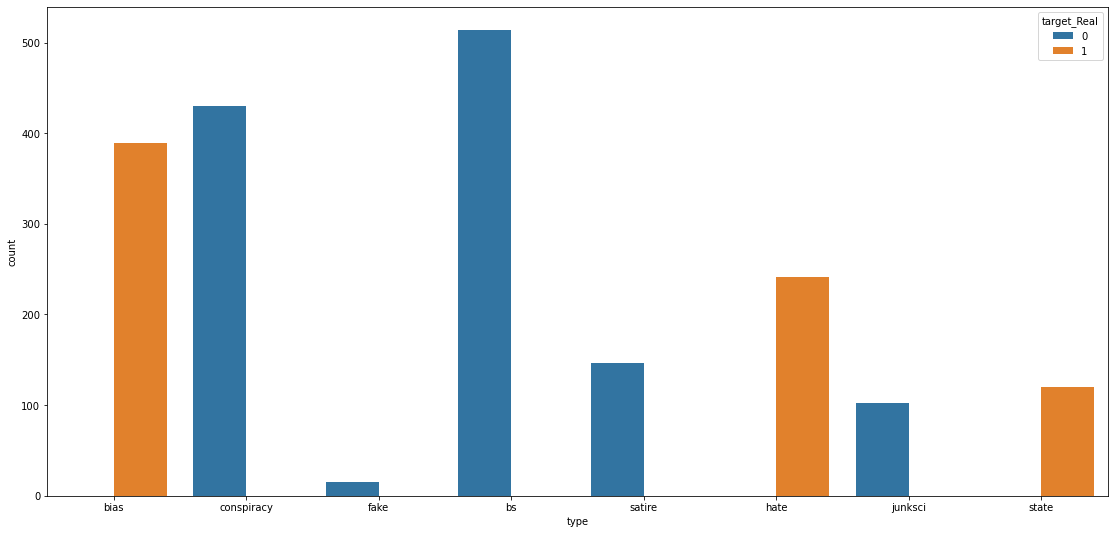

In [686]:
#bs = all are fake news
plt.figure(figsize=(19,9))
sns.countplot(x= 'type', hue= 'target_Real', data= df)

In [556]:
#will work with only numbers
#sns.pairplot(df,hue='label')

# Text Pre-Processing

### Stop words are already removed
### Punctuation are already removed
### Already in Lowercase

In [557]:
#bring the root of the words
def root_words(string):
    porter = PorterStemmer()
    
    #  sentence into a list of words
    words = word_tokenize(string)
    
    valid_words = []

    for word in words:
        
        root_word = porter.stem(word)
        
        valid_words.append(root_word)
        
    string = ' '.join(valid_words)

    return string 

sent = 'I played and started playing with players and we all love to play with plays'
root_words(sent)

'I play and start play with player and we all love to play with play'

In [558]:
def text_pipeline(input_string):
    input_string = root_words(input_string)   
    return input_string


In [559]:
df['title_after'] = df['title_without_stopwords']
df['title_after'] = df['title_without_stopwords'].apply(text_pipeline)

print("Clean TEXT from data:", df['title_without_stopwords'][0])
print("CLEANDED TEXT:", df['title_after'][0])

Clean TEXT from data: muslims busted stole millions govt benefits
CLEANDED TEXT: muslim bust stole million govt benefit


In [560]:
df['text_after'] = df['text_without_stopwords']
df['text_after'] = df['text_without_stopwords'].apply(text_pipeline)

In [561]:
df.tail(2)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage,target_Real,title_after,text_after
2044,Ann Coulter,2016-10-27T03:05:01.989+03:00,our new country women and minorities hit hardest,wars and rumors of wars russia unveils satan ...,english,wnd.com,http://www.wnd.com/files/2016/10/danney-willll...,bias,Real,wikileaks bombshells hillary need know,posted eddie skyhigh potency may scare away cr...,1.0,1,wikileak bombshel hillari need know,post eddi skyhigh potenc may scare away crysta...
2045,Larry Elder,2016-10-27T03:05:05.815+03:00,trump vs clinton a risk vs a disaster,check out hillarythemed haunted house anticlin...,english,wnd.com,http://www.wnd.com/files/2015/10/Hillary-Clint...,bias,Real,fascinated sex,billion even known keeping supposedly deleted ...,0.0,1,fascin sex,billion even known keep supposedli delet messa...


## TOP real title and text

In [562]:
from collections import Counter

In [563]:
#title
real_news = []
for x in df[df['target_Real'] == 1]['title_after'].tolist():
    for word in x.split():
        real_news.append(word)

In [564]:
len(real_news)

4948

In [565]:
# sns.barplot(pd.DataFrame(Counter(real_news).most_common(30))[0],pd.DataFrame(Counter(real_news).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

In [566]:
#title
pd.DataFrame(Counter(real_news).most_common(10))

,0,1
0,trump,173
1,titl,89
2,hillari,81
3,clinton,76
4,elect,40
5,obama,36
6,fbi,35
7,us,33
8,duke,33
9,video,31


In [567]:
#text
real_news2 = []
for x in df[df['target_Real'] == 1]['text_after'].tolist():
    for word in x.split():
        real_news2.append(word)

In [568]:
#text
pd.DataFrame(Counter(real_news2).most_common(10))

,0,1
0,trump,1695
1,clinton,1307
2,peopl,1080
3,one,1007
4,us,978
5,state,974
6,said,964
7,hillari,881
8,would,861
9,like,840


## Top Fake title and text

In [569]:
#title
fake_news = []
for x in df[df['target_Real'] == 0]['title_after'].tolist():
    for word in x.split():
        fake_news.append(word)

In [570]:
#title
pd.DataFrame(Counter(fake_news).most_common(10))

,0,1
0,clinton,152
1,hillari,144
2,trump,140
3,titl,87
4,elect,69
5,le,67
6,us,59
7,gorafi,52
8,vote,48
9,life,47


In [571]:
#text
fake_news2 = []
for x in df[df['target_Real'] == 0]['text_after'].tolist():
    for word in x.split():
        fake_news2.append(word)

In [572]:
#text
pd.DataFrame(Counter(fake_news2).most_common(10))

,0,1
0,clinton,2500
1,trump,2169
2,one,1493
3,hillari,1382
4,us,1361
5,said,1359
6,state,1351
7,would,1335
8,peopl,1324
9,like,1207


# Split the data into testing and training

In [664]:
X = df['title_after'].values +' ' +  df['type'].values +  ' ' + df['text_after'].values 

y = df['label'].values


In [665]:
print(df['title_after'].values)

['muslim bust stole million govt benefit'
 'attorney gener loretta lynch plead fifth'
 'break weiner cooper fbi hillari email investig' ...
 'youtub ban clinton black son' 'wikileak bombshel hillari need know'
 'fascin sex']


In [666]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test

In [667]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# This makes your vocab matrix
vectorizer.fit(X_train)

# This transforms your documents into vectors.
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape, type(X))

(1565, 26455) <class 'numpy.ndarray'>


In [668]:
features = vectorizer.get_feature_names()
weights = vectorizer.idf_

print(len(features), len(weights))

df_idf = pd.DataFrame.from_dict( {'feature': features, 'idf': weights})

df_idf = df_idf.sort_values(by='idf', ascending=False)

df_idf

26455 26455


,feature,idf
0,___,7.663133
14623,migratori,7.663133
14632,mikhail,7.663133
14631,mikelioni,7.663133
14629,mikaelthalen,7.663133
...,...,...
24058,trump,1.876235
13331,like,1.873173
17243,peopl,1.826861
22211,state,1.788202


In [669]:
X_train[0]

<1x26455 sparse matrix of type '<class 'numpy.float64'>'
	with 89 stored elements in Compressed Sparse Row format>

# Multinomial Naive Bayes

In [670]:
# Initalize our model.
model = MultinomialNB(alpha=.05)

# Fit our model with our training data.
model.fit(X_train, y_train)

# Make new predictions of our testing data. 
y_pred = model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)

# Evaluate our model
accuracy =  model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.772959


In [671]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

        Fake       0.77      0.90      0.83       242
        Real       0.77      0.57      0.66       150

    accuracy                           0.77       392
   macro avg       0.77      0.74      0.74       392
weighted avg       0.77      0.77      0.76       392



# Random Forest Classifier

In [672]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier()


# Fit our model with our training data.
rf_model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = rf_model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = rf_model.predict_proba(X_test)

# Evaluate our model
accuracy =  rf_model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

print(classification_report(y_test, y_pred, target_names=rf_model.classes_))

Model Accuracy: 0.880102
              precision    recall  f1-score   support

        Fake       0.85      0.98      0.91       242
        Real       0.95      0.73      0.82       150

    accuracy                           0.88       392
   macro avg       0.90      0.85      0.87       392
weighted avg       0.89      0.88      0.88       392



# BernoulliNB


In [673]:
from sklearn.naive_bayes import BernoulliNB


In [674]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

accuracy =  bnb.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)
print(classification_report(y_test, y_pred, target_names=bnb.classes_))

Model Accuracy: 0.696429
              precision    recall  f1-score   support

        Fake       0.85      0.98      0.91       242
        Real       0.95      0.73      0.82       150

    accuracy                           0.88       392
   macro avg       0.90      0.85      0.87       392
weighted avg       0.89      0.88      0.88       392



# GaussianNB

In [675]:
from sklearn.naive_bayes import GaussianNB

In [676]:
from sklearn.linear_model import LogisticRegression


In [677]:
# gnb = GaussianNB()
# gnb.fit(X_train,y_train)
# y_pred4 = gnb.predict(X_test)

# accuracy =  gnb.score(X_test, y_test)
# print("Model Accuracy: %f" % accuracy)
# print(classification_report(y_test, y_pred, target_names=gnb.classes_))

In [678]:
from sklearn.metrics import confusion_matrix

true-negitive: 236 
false-positive: 6 
false-negative: 41 
true-positive: 109


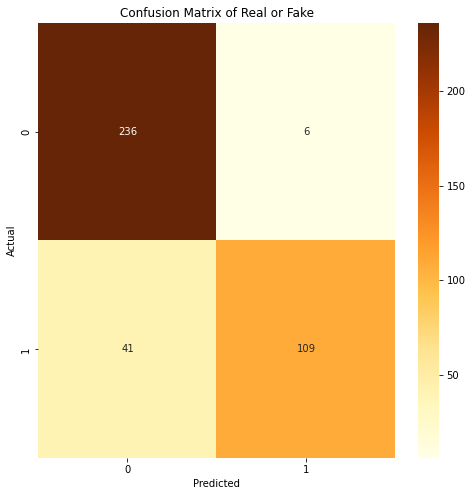

In [679]:

cm = confusion_matrix(y_test, y_pred)

cm = cm.round(2)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='YlOrBr', fmt='g')
plt.title("Confusion Matrix of Real or Fake")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

In [680]:
new_text = 'NEWS RELEASE: DOH CITES SIX COMPANIES FOR AIR PERMIT VIOLATIONS'
new_text = text_pipeline(new_text)

print(new_text)

new_text_vectorized = vectorizer.transform([new_text])

model.predict(new_text_vectorized)



new releas : doh cite six compani for air permit violat


array(['Real'], dtype='<U4')

In [ ]:
#how we can add percentage of how much is real or fake